# Borrower Data Overview

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

## I. Reading Data

In [9]:
company = pd.read_excel("company.xlsx")
facility = pd.read_excel("facility.xlsx")
package = pd.read_excel("package.xlsx")

## II. Company

In [10]:
company.head()

,CompanyID,Company,ParentID,UltimateParentID,Sales,Ticker,PublicPrivate,City,State,Country,ZipCode,Region,InstitutionType,PrimarySICCode,SecondarySICCode,TertiarySICCode
0,1,IBC Acquisitions,NaN,1.0,NaN,NaN,Private,Boston,Massachusetts,USA,NaN,North America,NaN,6799.0,NaN,NaN
1,2,UIS Inc,NaN,2.0,NaN,NaN,Private,New York,New York,USA,NaN,North America,NaN,3714.0,2064.0,3322.0
2,3,Chatswood Inc,NaN,3.0,NaN,NaN,Private,San Francisco,California,USA,NaN,North America,NaN,6799.0,NaN,NaN
3,4,American Community Development Group,NaN,4.0,NaN,NaN,Private,Petersburg,Florida,USA,NaN,North America,NaN,6553.0,NaN,NaN
4,6,Hoker Broadcasting,NaN,6.0,NaN,NaN,Private,Dallas,Texas,USA,NaN,North America,NaN,4832.0,NaN,NaN


In [11]:
company.shape

(141914, 16)

In [144]:
company.isnull().sum()/company.shape[0]*100

CompanyID            0.000000
Company              0.000000
ParentID            84.658314
UltimateParentID     0.008456
Sales               86.889947
Ticker              91.674535
PublicPrivate       47.813464
City                52.755894
State               70.741435
Country              0.000705
ZipCode             68.022887
Region               1.953296
InstitutionType     34.993729
PrimarySICCode      25.668363
SecondarySICCode    87.018194
TertiarySICCode     94.531900
dtype: float64

In [23]:
company["PublicPrivate"].value_counts()

Private    59342
Public     14718
Name: PublicPrivate, dtype: int64

In [28]:
# 11815
company.shape[0]-company["Ticker"].isnull().sum()

11815

In [46]:
company[~company["Ticker"].isnull()]["PublicPrivate"].value_counts()

Public     9515
Private     849
Name: PublicPrivate, dtype: int64

In [63]:
9515+849

10364

In [57]:
len(company[~company["Ticker"].isnull()]["PublicPrivate"])

11815

In [49]:
(~company["Ticker"].isnull()).sum()

11815

In [59]:
company[~company["Ticker"].isnull()]["PublicPrivate"].isnull().sum()

1451

In [60]:
9515+849+1451

11815

In [62]:
len(company["Ticker"].unique())

10555

In [145]:
95080/company.shape[0]

0.6699832292797047

## III. Facility

In [13]:
facility.head()

,FacilityID,PackageID,BorrowerCompanyID,Ticker,FacilityStartDate,FacilityEndDate,Company,TargetCompany,LoanType,PrimaryPurpose,SecondaryPurpose,FacilityAmt,Currency,ExchangeRate,Maturity,Secured,LCLimit,Renewal,DistributionMethod,AverageLife,Seniority,CountryOfSyndication,ConversionDate
0,1,100,33181,NaN,19870912,19950901.0,Sager Electical Supply Co,NaN,Term Loan,LBO,NaN,7000000.0,United States Dollars,1.0,96.0,Yes,NaN,NaN,NaN,NaN,Senior,USA,NaN
1,2,100,33181,NaN,19870912,19890901.0,Sager Electical Supply Co,NaN,Term Loan,Real estate,NaN,10000000.0,United States Dollars,1.0,24.0,Yes,NaN,NaN,NaN,NaN,Senior,USA,NaN
2,3,100,33181,NaN,19870912,19950901.0,Sager Electical Supply Co,NaN,Term Loan,LBO,NaN,13000000.0,United States Dollars,1.0,96.0,Yes,NaN,NaN,NaN,NaN,Senior,USA,NaN
3,4,100,33181,NaN,19870912,19950901.0,Sager Electical Supply Co,NaN,Revolver/Line >= 1 Yr.,LBO,NaN,20000000.0,United States Dollars,1.0,96.0,Yes,NaN,NaN,NaN,NaN,Senior,USA,NaN
4,5,101,3769,SGAL,19870805,19871105.0,Sage-Allen Co,NaN,Bridge Loan,LBO,NaN,18000000.0,United States Dollars,1.0,3.0,Yes,NaN,NaN,Syndication,NaN,Senior,USA,NaN


In [14]:
facility.shape

(377257, 23)

In [15]:
facility.isnull().sum()

FacilityID                   0
PackageID                    0
BorrowerCompanyID            0
Ticker                  292983
FacilityStartDate            0
FacilityEndDate          35301
Company                      0
TargetCompany           366828
LoanType                     1
PrimaryPurpose               0
SecondaryPurpose        313095
FacilityAmt                634
Currency                     0
ExchangeRate                 0
Maturity                 31388
Secured                 210090
LCLimit                 376225
Renewal                 375554
DistributionMethod       15877
AverageLife             343175
Seniority                    1
CountryOfSyndication       100
ConversionDate          375398
dtype: int64

In [65]:
len(facility["BorrowerCompanyID"].unique())

95080

In [70]:
len(facility["PackageID"].unique())

257464

In [130]:
facility["PrimaryPurpose"].value_counts()/facility.shape[0]*100

Corp. purposes                              41.942230
Debt Repay.                                 11.479442
Work. cap.                                  10.078541
Proj. finance                                5.847473
LBO                                          5.614740
Acquis. line                                 5.007197
Takeover                                     4.048964
Real estate                                  3.283173
Capital expend.                              2.404462
CP backup                                    1.553583
Recap.                                       1.092889
Dividend Recap                               1.014693
SBO                                          0.983945
Other                                        0.933316
Ship finance                                 0.737958
Trade finance                                0.550288
Aircraft finance                             0.416427
Equip. Purch.                                0.350689
Debtor-in-poss.             

In [151]:
copy_facility = copy(facility)
copy_facility.set_index('BorrowerCompanyID', inplace = True)

In [166]:
copy_facility = copy_facility[copy_facility["FacilityStartDate"] >= 19900101]
len(copy_facility.loc[borrowers_id,:])#/facility.shape[0]

88933

In [167]:
copy_facility["PrimaryPurpose"].value_counts()/copy_facility.shape[0]*100

Corp. purposes                              42.363497
Debt Repay.                                 11.376969
Work. cap.                                   9.880945
Proj. finance                                5.918736
LBO                                          5.480651
Acquis. line                                 5.054180
Takeover                                     3.841749
Real estate                                  3.315345
Capital expend.                              2.449979
CP backup                                    1.541399
Recap.                                       1.080897
Dividend Recap                               1.033902
SBO                                          1.002571
Other                                        0.950984
Ship finance                                 0.751928
Trade finance                                0.550982
Aircraft finance                             0.424310
Equip. Purch.                                0.357328
Debtor-in-poss.             

In [168]:
len(copy_facility["PrimaryPurpose"].unique())

42

## IV. Package

In [16]:
package.head()

,PackageID,BorrowerCompanyID,Ticker,DealActiveDate,Company,Comment,DealAmount,Currency,ExchangeRate,SalesAtClose,DealPurpose,DealStatus,ProjectFinanceType,TermChanges,CollateralRelease,PercentageofExcessCF,PercentageofNetIncome,ExcessCFSweep,Active,RefinancingIndicator,Hybrid,AssignmentMin,AssignmentFee,AssignmentRestrictions,AgentConsent,CompanyConsent,DefaultBaseRate,SpreadoverDefaultBase,ProRataAllocation,AssetSalesSweep,DebtIssuanceSweep,EquityIssuanceSweep,DividendRestrictions,InsuranceProceedsSweep,RequiredLenders
0,100,33181,NaN,19870912,Sager Electical Supply Co,NaN,50000000.0,United States Dollars,1.0,77600000.0,LBO,Completed,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101,3769,SGAL,19870805,Sage-Allen Co,NaN,18000000.0,United States Dollars,1.0,77600000.0,LBO,Completed,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,102,1,NaN,19870912,IBC Acquisitions,NaN,370000000.0,United States Dollars,1.0,749337000.0,Acquis. line,Completed,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103,2,NaN,19870901,UIS Inc,NaN,10000000.0,United States Dollars,1.0,469482000.0,Takeover,Completed,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104,2,NaN,19870908,UIS Inc,NaN,10000000.0,United States Dollars,1.0,469482000.0,Takeover,Completed,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
package.shape

(257468, 35)

In [67]:
package.isnull().sum()/package.shape[0]*100

PackageID                   0.000000
BorrowerCompanyID           0.000000
Ticker                     76.340361
DealActiveDate              0.000000
Company                     0.000000
Comment                    76.743129
DealAmount                  0.026023
Currency                    0.000000
ExchangeRate                0.000000
SalesAtClose               69.527087
DealPurpose                 0.000000
DealStatus                  0.000000
ProjectFinanceType         94.901502
TermChanges                90.716516
CollateralRelease          94.817608
PercentageofExcessCF       99.965044
PercentageofNetIncome      99.880762
ExcessCFSweep              95.913667
Active                      0.001942
RefinancingIndicator       63.522846
Hybrid                     62.129663
AssignmentMin              90.231407
AssignmentFee              90.475321
AssignmentRestrictions    100.000000
AgentConsent               89.420044
CompanyConsent             89.422763
DefaultBaseRate            87.398434
S

In [68]:
len(package["BorrowerCompanyID"].unique())

95081

In [69]:
len(package["BorrowerCompanyID"])

257468

In [71]:
len(package["PackageID"].unique())

257468

In [129]:
package["DealPurpose"].value_counts()/package.shape[0]*100

Corp. purposes                              45.999891
Work. cap.                                  11.915656
Debt Repay.                                 11.301987
Proj. finance                                4.988193
Acquis. line                                 4.013314
Real estate                                  3.788432
Takeover                                     3.171656
LBO                                          3.010471
Capital expend.                              2.559541
CP backup                                    1.794398
Other                                        0.931766
Ship finance                                 0.757764
Recap.                                       0.655615
Trade finance                                0.627651
Dividend Recap                               0.599298
SBO                                          0.513462
Aircraft finance                             0.487439
Undisclosed                                  0.349558
Equip. Purch.               

In [155]:
copy_package = copy(package)
copy_package.set_index('BorrowerCompanyID', inplace = True)

In [164]:
copy_package = copy_package[copy_package["DealActiveDate"] >= 19900101]
len(copy_package.loc[borrowers_id,:])#/package.shape[0]

62829

In [169]:
copy_package["DealPurpose"].value_counts()/copy_package.shape[0]*100

Corp. purposes                              46.438771
Work. cap.                                  11.738726
Debt Repay.                                 11.215860
Proj. finance                                5.034957
Acquis. line                                 4.043097
Real estate                                  3.831178
Takeover                                     2.955774
LBO                                          2.887247
Capital expend.                              2.610366
CP backup                                    1.771405
Other                                        0.950268
Ship finance                                 0.772811
Recap.                                       0.645264
Trade finance                                0.631400
Dividend Recap                               0.611198
SBO                                          0.523658
Aircraft finance                             0.497118
Undisclosed                                  0.356499
Equip. Purch.               

In [170]:
len(copy_package["DealPurpose"].value_counts())

41

In [178]:
df = pd.DataFrame(zip(copy_package["Company"], 
                      np.array(copy_package['DealAmount'])*np.array(copy_package['ExchangeRate'])/1000000),
                 index = copy_package.index, 
                 columns = ["Company", "DealAmount(M)"])
df

,Company,DealAmount(M)
BorrowerCompanyID,,
332,JP Industries,150.000000
1288,HiMEDICS Inc,0.500000
1365,Tuscarora Plastics Inc,6.000000
1923,Builders Transport,50.000000
2515,Bessemer Securities Corp,320.000000
2539,Panda Energy International Inc,131.861200
2552,Union Bancshares,8.000000
2616,Hofmann Industries,24.392365
2805,Promus Cos,1019.506000


In [184]:
df.sort_values(by=['DealAmount(M)'],ascending = False)

,Company,DealAmount(M)
BorrowerCompanyID,,
17045,Hellenic Republic of Greece,165665.844135
17045,Hellenic Republic of Greece,130233.664800
86636,Broadcom Corp,100000.000000
38003,Enel SpA,75189.677150
126579,Anheuser-Busch InBev NV/SA [ABInBev],75000.000000
170538,Altice NV,70000.000000
37336,E.ON AG [EON],63570.145100
37326,Verizon Communications Inc,61000.000000
113689,Alliance Boots Plc,58143.213243


In [185]:
df.describe()

,DealAmount(M)
count,252388.000000
mean,341.248314
std,1227.309158
min,0.000000
25%,12.400000
50%,85.000000
75%,280.000000
max,165665.844135


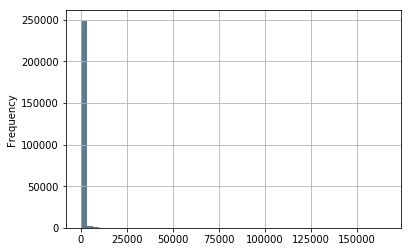

In [197]:
pd.Series(df["DealAmount(M)"]).plot.hist(grid=True, bins=50, rwidth=0.9,
                   color='#607c8e')

{'whiskers': [<matplotlib.lines.Line2D at 0x2023667bf98>,
 'caps': [<matplotlib.lines.Line2D at 0x20236697668>,
 'boxes': [<matplotlib.lines.Line2D at 0x2023667bba8>],
 'medians': [<matplotlib.lines.Line2D at 0x20236697cf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x20236697dd8>],
 'means': []}

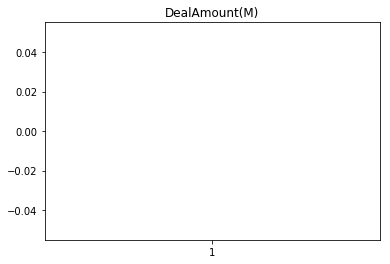

In [202]:
fig1, ax1 = plt.subplots()
ax1.set_title('DealAmount(M)')
ax1.boxplot(np.array(df["DealAmount(M)"]))

In [182]:
df.groupby("Company").sum().sort_values(by=["DealAmount(M)"], ascending = False)

,DealAmount(M)
Company,
Hellenic Republic of Greece,407082.521372
Wal-Mart Stores Inc,256112.965953
General Electric Capital Corp,215480.212260
E.ON AG [EON],210442.942438
Enel SpA,200083.795188
Toyota Motor Credit Corp,196407.030818
Telefonica SA,195959.260653
Anheuser-Busch InBev NV/SA [ABInBev],194200.000000
International Business Machines (IBM Corp),185935.986443


## V. Link Data

In [72]:
link = pd.read_excel("Dealscan-Compustat Linking Database.xlsx", sheet_name = "link_data") 

In [73]:
link.head()

,facid,bcoid,company,coname_h,facstartdate,fic,gvkey,score_company_coname_h_match,score_ticker_smbl_h_match,smbl_h,ticker,discrep_bcoid_flag,discrep_company_score,discrep_ticker_score,discrep_facstartdate_days
0,5,3769,Sage-Allen Co,SAGE-ALLEN & CO INC,1987-08-05,USA,9362,100,100.0,SGAL,SGAL,0,100,100.0,0.0
1,11,3782,Hanson Trust,HANSON TRUST PLC-ADR,1987-09-01,GBR,12826,100,NaN,HAN,NaN,0,100,NaN,0.0
2,13,4,American Community Development Group,AMERICAN CMNTY DEVLOPMENT GP,1987-08-01,USA,6300,97,NaN,ACDGE,NaN,0,100,NaN,0.0
3,14,4,American Community Development Group,AMERICAN CMNTY DEVLOPMENT GP,1987-08-01,USA,6300,97,NaN,ACDGE,NaN,0,100,NaN,0.0
4,16,3788,Computer Image,COMPUTER IMAGE CORP,1987-09-12,USA,3321,100,NaN,2227B,NaN,0,100,NaN,0.0


In [74]:
link.shape

(177012, 15)

In [75]:
link.isnull().sum()

facid                                0
bcoid                                0
company                              0
coname_h                             0
facstartdate                         2
fic                                 88
gvkey                                0
score_company_coname_h_match         0
score_ticker_smbl_h_match       112601
smbl_h                           61463
ticker                          102211
discrep_bcoid_flag                   0
discrep_company_score                0
discrep_ticker_score            102211
discrep_facstartdate_days          404
dtype: int64

In [76]:
len(link["bcoid"].unique())

29502

In [77]:
len(link["gvkey"].unique())

20503

In [111]:
temp_set = set(zip(link["bcoid"], link["gvkey"]))
len(temp_set)

30125

In [112]:
temp_lst = list(temp_set)
len(temp_lst)

30125

In [113]:
sorted(temp_lst, key=lambda x: x[0])

[(4, 6300),
 (7, 7479),
 (12, 11813),
 (17, 16334),
 (19, 1414),
 (19, 3243),
 (20, 14896),
 (21, 2872),
 (23, 2110),
 (24, 1045),
 (24, 1388),
 (26, 3735),
 (27, 9985),
 (28, 9557),
 (29, 8186),
 (31, 24782),
 (33, 6790),
 (36, 21616),
 (37, 4674),
 (38, 13114),
 (38, 165264),
 (39, 5793),
 (40, 14356),
 (41, 12404),
 (43, 12271),
 (44, 8648),
 (45, 7081),
 (47, 11191),
 (49, 10860),
 (50, 10508),
 (51, 1773),
 (52, 8222),
 (53, 8816),
 (54, 13730),
 (56, 6707),
 (59, 13573),
 (60, 6443),
 (61, 18043),
 (63, 1274),
 (64, 12880),
 (65, 2845),
 (66, 1350),
 (67, 14464),
 (68, 3020),
 (69, 5969),
 (70, 2337),
 (71, 5235),
 (72, 15127),
 (74, 12484),
 (76, 1687),
 (77, 14641),
 (78, 11830),
 (79, 11506),
 (80, 9566),
 (81, 13194),
 (82, 103260),
 (83, 2928),
 (87, 11212),
 (88, 13458),
 (89, 10182),
 (90, 14997),
 (91, 13218),
 (94, 6963),
 (95, 25217),
 (96, 13870),
 (98, 5886),
 (99, 100424),
 (100, 7440),
 (102, 4534),
 (103, 4061),
 (104, 13032),
 (105, 14457),
 (107, 1922),
 (108, 10

In [114]:
sorted(temp_lst, key=lambda x: x[1])

[(3639, 1004),
 (131722, 1004),
 (16227, 1010),
 (2175, 1012),
 (29173, 1013),
 (354, 1020),
 (18053, 1021),
 (777, 1023),
 (1629, 1034),
 (26046, 1034),
 (84745, 1034),
 (1231, 1036),
 (12588, 1036),
 (89361, 1037),
 (3586, 1038),
 (22359, 1038),
 (19248, 1038),
 (215, 1038),
 (21195, 1040),
 (25605, 1043),
 (1185, 1043),
 (32146, 1045),
 (24, 1045),
 (109273, 1045),
 (121678, 1045),
 (28822, 1050),
 (3635, 1054),
 (596, 1055),
 (2463, 1056),
 (30274, 1056),
 (3304, 1059),
 (12312, 1075),
 (11602, 1075),
 (18966, 1076),
 (129187, 1076),
 (118792, 1078),
 (21827, 1078),
 (92935, 1078),
 (24540, 1081),
 (97006, 1081),
 (16079, 1081),
 (34514, 1081),
 (1658, 1083),
 (118571, 1083),
 (12806, 1086),
 (2191, 1090),
 (95208, 1094),
 (9559, 1095),
 (143497, 1096),
 (32323, 1097),
 (1059, 1103),
 (89134, 1104),
 (11448, 1107),
 (2278, 1108),
 (17542, 1111),
 (884, 1112),
 (2983, 1113),
 (16148, 1115),
 (96771, 1117),
 (15223, 1117),
 (17108, 1121),
 (14506, 1128),
 (109168, 1137),
 (112884, 11

In [108]:
target_lst = []
uni_cid = []
uni_gvkey = []
remove1 = []
remove0 = []

for item in temp_set:
    if item[0] in uni_cid:
        remove0.append(item[0])
    else:
        uni_ticker.append(item[0])
    
    if item[1] in uni_gvkey:
        remove1.append(item[1])
    else:
        uni_gvkey.append(item[1])
        

In [115]:
from copy import copy

temp_temp_set = copy(temp_set)
for item in temp_temp_set:
    if (item[0] in remove0) or (item[1] in remove1):
        temp_set.remove(item)
        
len(temp_set)

15454

In [131]:
unique_cid = [x[0] for x in temp_set]
unique_gvkey = [x[1] for x in temp_set]

In [140]:
borrowers_id = []
borrowers_gvkey = []

dic = dict(zip(unique_cid, unique_gvkey))

for x in bcid_lst:
    if dic.get(x):
        borrowers_id.append(x)
        borrowers_gvkey.append(dic[x])

len(borrowers_id)

15319

In [141]:
#write borrowers_gvkey

with open('borrowers_gvkey.txt', 'w') as f:
    for item in borrowers_gvkey:
        f.write("%s\n" % item)

In [143]:
#write borrowers_id

with open('borrowers_id.txt', 'w') as f:
    for item in borrowers_id:
        f.write("%s\n" % item)

In [146]:
15319/95080

0.16111695414387883